<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px"\>

# Matplotlib at a High Level

_Author: Ben Shaver (DC)_

## Learning Objectives:
*This notebook will serve as a reference for:*

* Understanding the ontology and high level syntax of Matplotlib
* Outlining the two ways of using Matplotlib


## A Note:

This is *not* a tutorial on how to create basic plots with Matplotlib, or a guide to customizing your plots. There are a million and one of those around already. I recommend the [Matplotlib Gallery](https://matplotlib.org/gallery.html) or the [Python Graph Gallery](https://python-graph-gallery.com/) for info on how to create specific visualizations. For the purposes of this overview, I'll restrict myself to simple scatter plots.

If you are not confused by Matplotlib syntax or you want to jump straight in to plotting with Matplotlib and Pandas, you may prefer to begin with [Visualization with Matplotlib and Pandas](01-Viz_in_Matplotlib_and_Pandas.ipynb)

# Intro to Matplotlib

[Matplotlib](https://matplotlib.org/) is a Python 2D plotting library with an interface inspired by MATLAB. Typically, you will import and interact with the Matplotlib module "pyplot" under the `plt` alias:

In [1]:
import matplotlib.pyplot as plt

The `plt` alias will prefix most commmands you will use from Matplotlib. 

Matplotlib works by instantiating a `figure` object and then placing data, labels, annotations, etc. on top of that `figure` object in successive commands.

`plt.show()` will display the visualization you've created:

In [2]:
plt.scatter(x=[1,2,3], y=[5,6,4])

# Notice that no plot is returned by this command.

In [3]:
# In order to squelch the message printed to the console,
# I sometimes assign my matplotlib commands into a underscore:

_ = plt.scatter(x=[1,2,3], y=[5,6,4])

In [4]:
# Edit for DSI-8: Actually its probably best to just drop a wee semi-colon:

plt.scatter(x=[1,2,3], y=[5,6,4]);

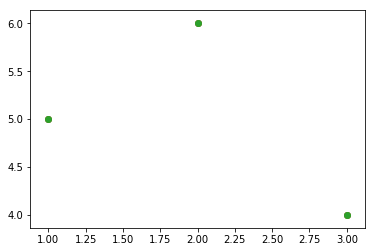

In [5]:
plt.show() # Display the plot

In order to avoid having to run `plt.show()` in every cell where you create a visualization, you can use an IPython 'magic' command which tells your Jupyter notebook to automatically display plots:

In [6]:
% matplotlib inline

So you'd normally just put that command with the rest of your import statements:
```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import killer.robots as kr
%matplotlib inline
```

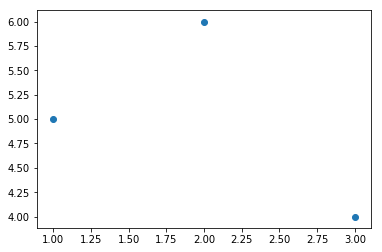

In [7]:
plt.scatter(x=[1,2,3], y=[5,6,4]);

# Now my plot is displayed automatically

# Two Interfaces

Matplotlib provides "two interfaces for the price of one."

The first is the MATLAB-style interface which is the more familiar interface for most beginning users. Using Matplotlib in this way, basically every command will begin with `plt`.

The second is an object-oriented interface where the objects that make up a Matplotlib visualization are interacted with directly. When you see `fig`, `figure`, `ax`, and the like, you're probably seeing the object-oriented interface at work.

Lets load in and plot the famous Iris dataset in each interface so you can see the main differences:

In [8]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)

## MATLAB-style Interface

Typically, `plt.plot()` instantiates the figure and plots the data:

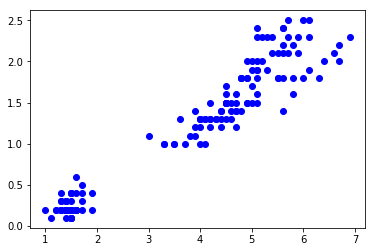

In [16]:
plt.plot(iris['petal length (cm)'], iris['petal width (cm)'], 'bo');

# Check: what are the basic arguments to plot?

`'bo'` is just a shortcut for `marker='o'` and `color='b'`. (Setting the marker equal to a circle gives us a scatter plot, rather than a line graph.)

This line of code accomplishes the same thing:
```
plt.scatter(iris['petal length (cm)'], iris['petal width (cm)'], color='b')
```

We can add axis labels and a title by calling further `plt` commands:

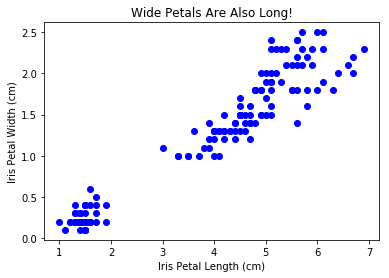

In [22]:
plt.plot(iris['petal length (cm)'], iris['petal width (cm)'], 'bo')
plt.title("Wide Petals Are Also Long!")
plt.xlabel("Iris Petal Length (cm)")
plt.ylabel("Iris Petal Width (cm)");

Other common commands you might use in this context are `plt.legend`, `plt.xlim`, and `plt.xticks`. These make a legend, adjust the limits of the X-axis, and modify the location of ticks on the X-axis, respectively. For the last two, there are equivalent functions for the Y-axis.

I find myself using `plt.xticks(rotation=45)` to rotate text labels on the X-axis of bar charts all the time.

## Object-oriented Interface

This interface allows access to the objects working "under the hood" of the MATLAB-style interface. By accessing these elements directly, this interface is much more flexible, which is why almost all of the really big visualizations I've seen done in Matplotlib make use of it. In particular, visualizations with many subplots make use of the object-oriented interface.

Let's create the same visualization as above, using this more explicit interface:

In [23]:
# First, we can manually instantiate a figure:
fig = plt.figure()

# Hmm. Not much has happened

<Figure size 432x288 with 0 Axes>

We must instantiate at least one *axes* object. These are -- you guessed it -- the axes that our data are plotted on. You may add axes using the (drumroll...) `add_axes` method of the `fig` object we've just created.

(Remember the object-oriented framework we're working in: `fig` is an *instance* of the Matplotlib `figure` class.

For reasons that will become clear, however, let's use the `add_subplot` method instead:

In [ ]:
ax = fig.add_subplot(111)

Now we have two objects to interact with: a `figure` and an `axes`. Our visualization will always be just one `figure`, but we might have more than one `axes` object, on which we plot different data.

Let's go ahead and plot data:

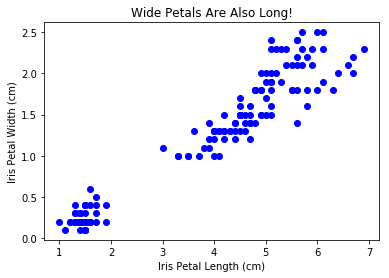

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)


ax.plot(iris['petal length (cm)'], iris['petal width (cm)'], 'bo')

# Does this look familiar? Instead of calling plt.plot,
# we've manually created a figure and an axes object,
# then we've called the plot method on the axes object we created!

ax.set_title("Wide Petals Are Also Long!")
ax.set_xlabel("Iris Petal Length (cm)")
ax.set_ylabel("Iris Petal Width (cm)");

# Boom. 

# But:
# These commands will still work! Why?
# (Play around with commenting and uncommenting the above and below 3 lines,
# and verify that this is true.)

# _ = plt.title("Wide Petals Are Also Long!")
# _ = plt.xlabel("Iris Petal Length (cm)")
# _ = plt.ylabel("Iris Petal Width (cm)")

The MATLAB interface and the object-oriented interface work interchangeably! They're both still operating on the same Matplotlib object, under the hood.

matplotlib.axes._subplots.AxesSubplot

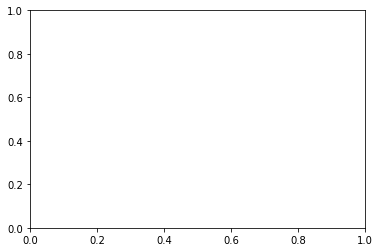

In [27]:
# Well, what if we wanted to create two subplots, side by side?

fig = plt.figure()
ax = fig.add_subplot(111)

type(ax) # This is a single AxesSubplot. Hmm..

The `plt.subplots` function returns an instance of the `Figure` class and something else, which we've assigned to `ax`...

<class 'numpy.ndarray'>
2
<class 'matplotlib.axes._subplots.AxesSubplot'>


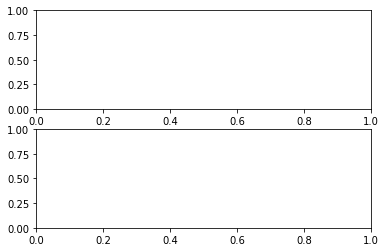

In [33]:
fig, ax = plt.subplots(2)

print(type(ax)) # Its an array. Huh.
print(len(ax))  # of Length 2.
print(type(ax[0])) # Bruh. Its an array containing two AxesSubplot objects!

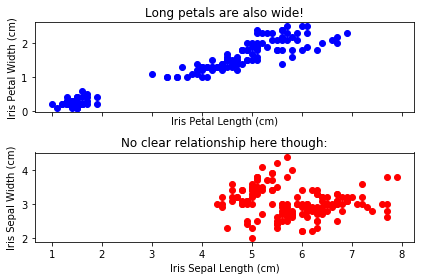

In [42]:
fig, ax = plt.subplots(2, sharex=True) #sharey=True)

# Using the array *ax* we can refer to each axes object independently!

_ = ax[0].plot(iris['petal length (cm)'], iris['petal width (cm)'], 'bo')

_ = ax[0].set_title("Long petals are also wide!")
_ = ax[0].set_xlabel("Iris Petal Length (cm)")
_ = ax[0].set_ylabel("Iris Petal Width (cm)")

# What should we do with ax[1]?
# Your code here:

_ = ax[1].plot(iris['sepal length (cm)'], iris['sepal width (cm)'], 'ro')
_ = ax[1].set_title("No clear relationship here though:")
_ = ax[1].set_xlabel("Iris Sepal Length (cm)")
_ = ax[1].set_ylabel("Iris Sepal Width (cm)")

# Nice new function that handles subplot layout for us:
_ = plt.tight_layout() 

# Now it annoys me that my X- and Y-axes are not the same, so
# lets make them the same. Add "sharex=True, sharey=True" to
# the original plt.subplots function call.

## How do we make subplots with the MATLAB interface?

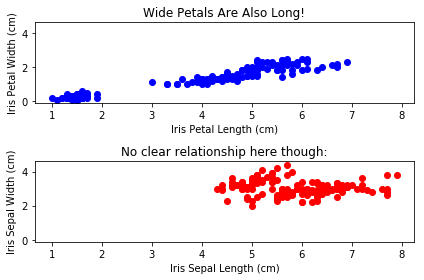

In [43]:
ax1 = plt.subplot(211) 
plt.plot(iris['petal length (cm)'], iris['petal width (cm)'], 'bo')
plt.title("Wide Petals Are Also Long!")
plt.xlabel("Iris Petal Length (cm)")
plt.ylabel("Iris Petal Width (cm)")

ax2 = plt.subplot(212, sharex=ax1, sharey=ax1)
plt.plot(iris['sepal length (cm)'], iris['sepal width (cm)'], 'ro')
plt.title("No clear relationship here though:")
plt.xlabel("Iris Sepal Length (cm)")
plt.ylabel("Iris Sepal Width (cm)")
plt.tight_layout();

Notice that the first `plt.subplot` function call doesn't need to
be assigned to anything, except we want to use the `sharex` and
`sharey` parameters of the second `plt.subplot` call, so we need some
way of referring to the first axes object. 

`ax2`, on the other hand,
is completely superfluous.

# Conclusion:

You can (and will) use the MATLAB interface *and* the object-oriented interface interchangeably. But knowing which is which will be invaluable as you explore Matplotlib and experience visualization code "in the wild."

You may have noticed I did not discuss Pandas or Seaborn at all. Pandas offers its own plotting functionality which is built on top of Matplotlib. Try inserting Pandas `.plot` commands into some of the above cell blocks. You'll see its just a wrapper on `plt.plot`. In this way, Pandas is like a *third* interface to Matplotlib. Keep that in mind.

Seaborn is another visualization library built on top of Matplotlib. It extends the functionality of Matplotlib and introduces some common sense features, like passing a dataframe to a `data` parameter and referring to column names simply as strings. I recommend thinking of it as an extension to Matplotlib, rather than as a new library to learn. Therefore, the key takeaways from this notebook are still applicable if you plan to rely on Seaborn heavily.

# Sources:

[Visualization Using Matplotlib, from the Python Data Science Handbook (highly recommended!)](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.00-Introduction-To-Matplotlib.ipynb)

[Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part1-Figures_Subplots_and_layouts.ipynb)